In [2]:
import pandas as pd
#Reading the CSV file
df = pd.read_csv("C:\\Users\\DELL\\iris.csv")

#Printing top 5 rows
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Getting Information about the dataset
# Use the Shape Parameter to get the shape of the dataset & it will return the number of rows and columns in the dataset
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# To Check the Misiing Values in the Dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Checking Duplicates
data = df.drop_duplicates(subset = "species",)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [9]:
# To see if the dataset is balanced or not
# Means All the species contain equal amount of rows or not
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
dtype: int64

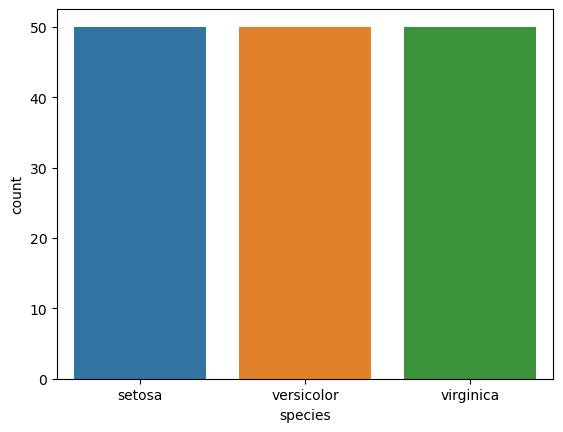

In [10]:
# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='species', data= df,)
plt.show()

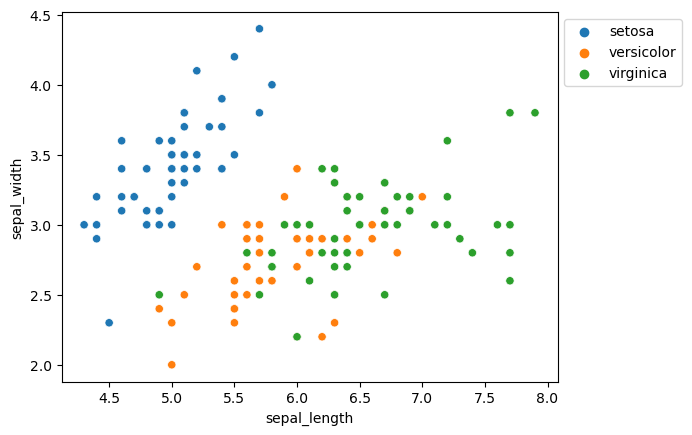

In [12]:
# Comparing Sepal Length and Sepal Width
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df,)
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

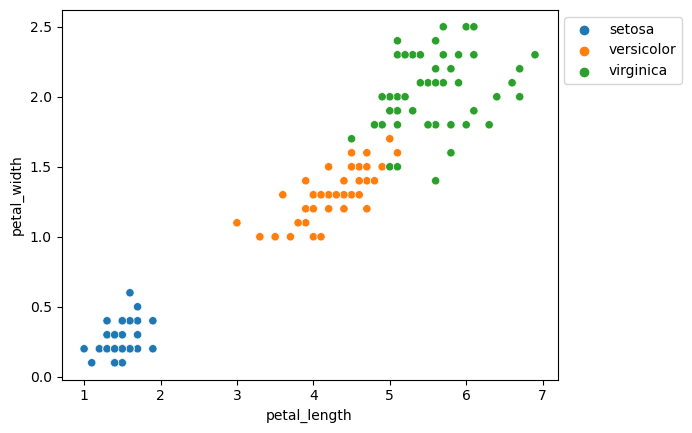

In [17]:
# Comparing Petal Length and Petal Width
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df,)
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

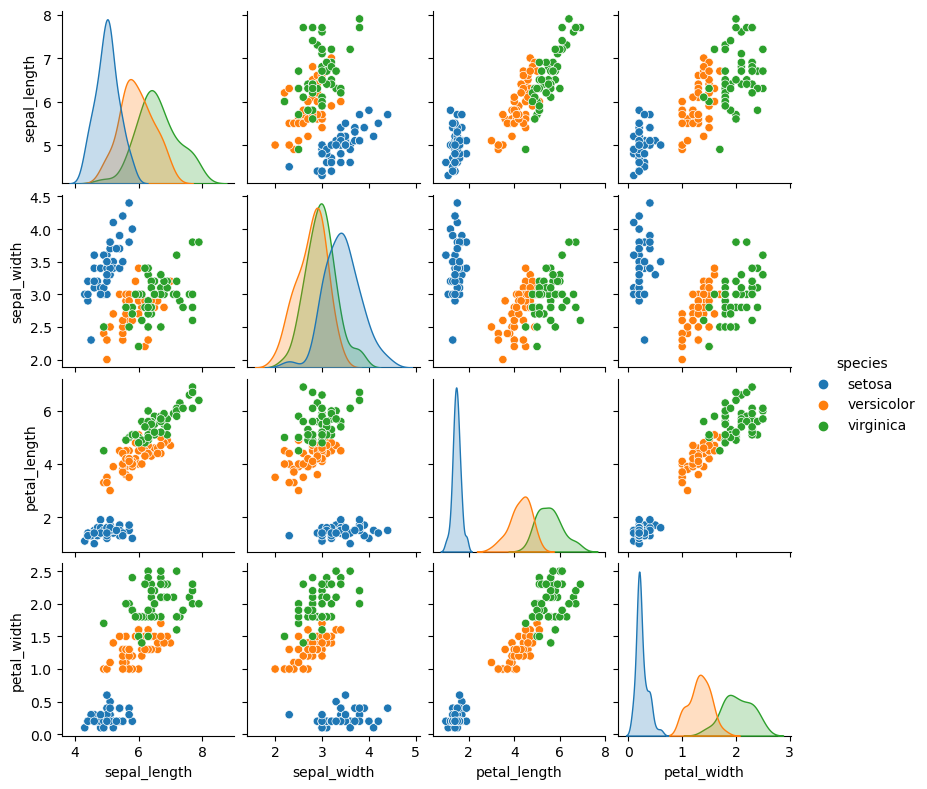

In [21]:
# Plot all the column's relationships using a pairplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(hue='species', height=2, data=df,)

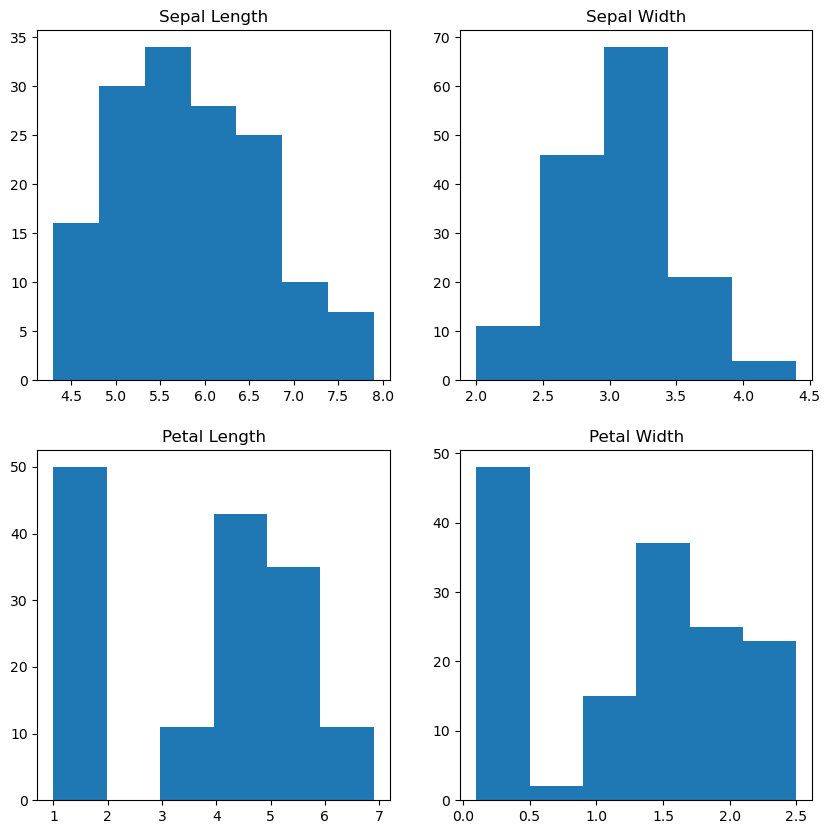

In [27]:
# Histograms
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(10,10))

axes[0,0].set_title('Sepal Length')
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title('Sepal Width')
axes[0,1].hist(df['sepal_width'], bins=5);

axes[1,0].set_title('Petal Length')
axes[1,0].hist(df['petal_length'], bins=6);

axes[1,1].set_title('Petal Width')
axes[1,1].hist(df['petal_width'], bins=6);

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

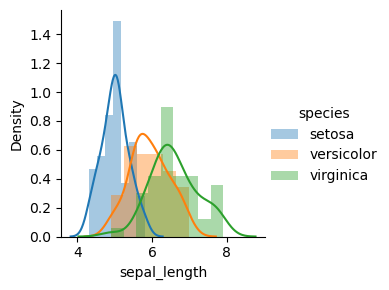

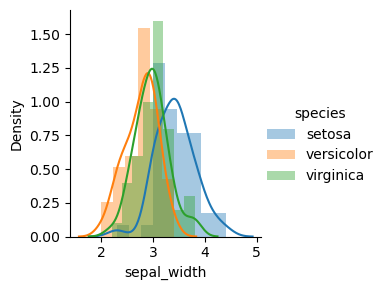

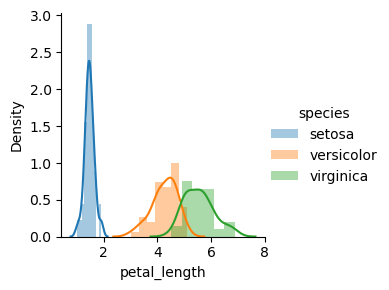

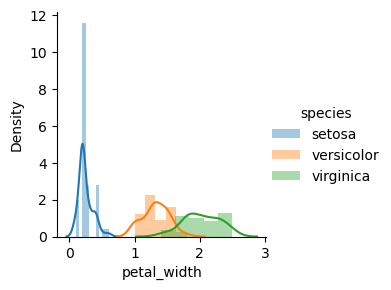

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'sepal_length').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'sepal_width').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'petal_length').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'petal_width').add_legend()

plt.show()



In [30]:
#Handling Correlation
data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.999226,0.795795,0.643817
sepal_width,-0.999226,1.000000,-0.818999,-0.673417
petal_length,0.795795,-0.818999,1.000000,0.975713
petal_width,0.643817,-0.673417,0.975713,1.000000


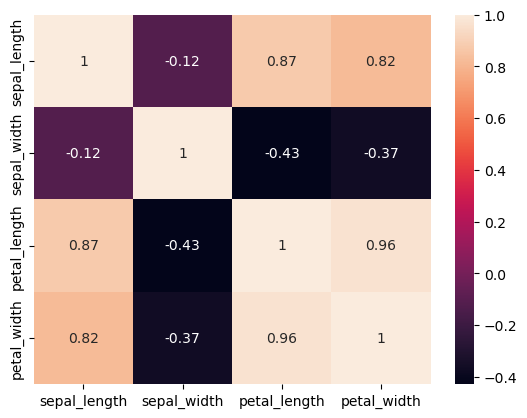

In [33]:
#Heatmaps
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(method='pearson'), annot=True);
plt.show()

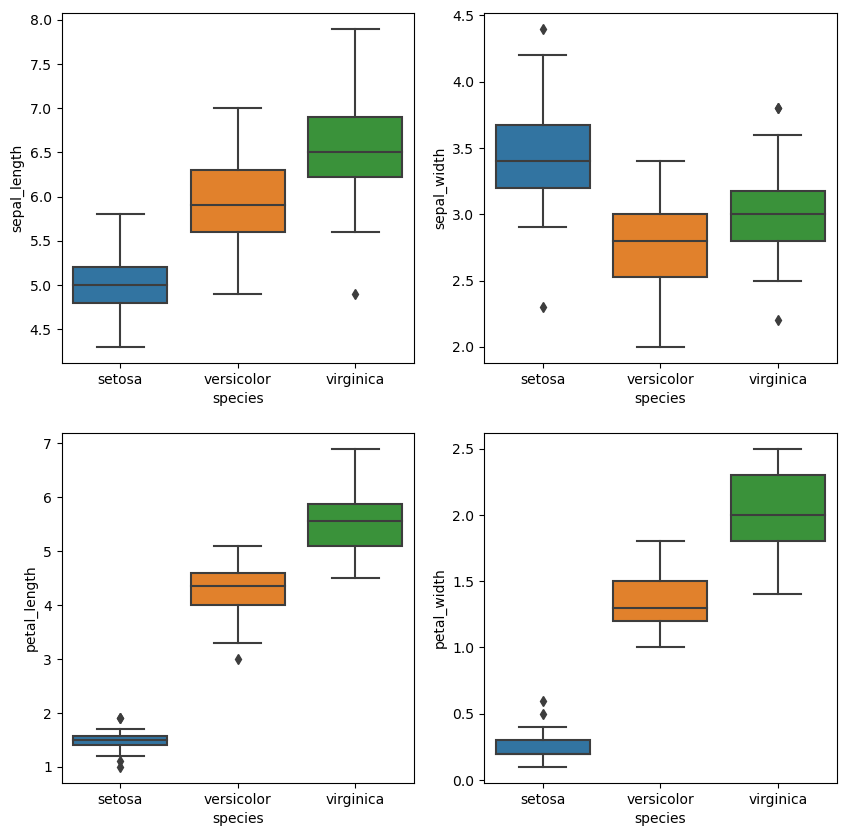

In [35]:
#Box Plots
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
    sns.boxplot(x='species', y=y, data=df)
plt.figure(figsize=(10,10))

plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()




<AxesSubplot:xlabel='sepal_width'>

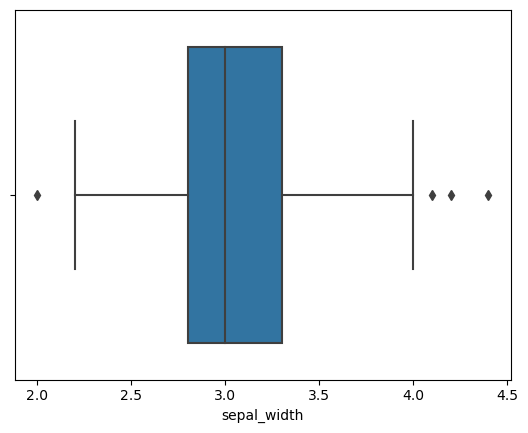

In [36]:
#Handling Outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='sepal_width', data=df)

Old Shape: (150, 5)
New Shape: (146, 5)


<AxesSubplot:xlabel='sepal_width'>

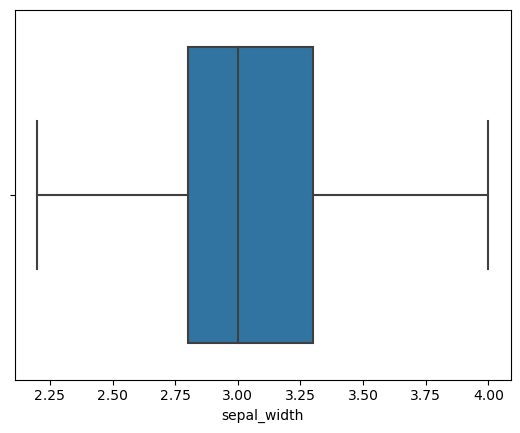

In [44]:
#Removing Outliers
import sklearn 
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("C:\\Users\\DELL\\iris.csv")
Q1= np.percentile(df['sepal_width'],25,interpolation = 'midpoint')
Q3= np.percentile(df['sepal_width'],75,interpolation = 'midpoint')
IQR = Q3-Q1
print("Old Shape:",df.shape)

upper= np.where(df['sepal_width']>= (Q3+1.5*IQR))
lower= np.where(df['sepal_width']<= (Q1-1.5*IQR))
                
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)
print("New Shape:", df.shape)
sns.boxplot(x='sepal_width', data=df)
                

